## Micro-Credit Defaulter Model

###  Description

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
Telecommnucating company are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days.
. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

###  import Liberary

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder  # COnvert string data to into the numeric data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

### Upload Data Set

In [8]:
df=pd.read_excel("C:\\Data\\training\\CreditLoan.xlsx")

In [9]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,116848,1,00004I82738,171.0000,9.290000,9.290000,-78.24,-78.24,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-06-06
1,41260,1,00005I96753,207.0000,79.706000,79.706000,1010.02,1010.02,5.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.50,1.500000,UPW,2016-06-22
2,55790,1,00010I89237,352.0000,20941.368000,21070.120000,2099.04,1443.32,10.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.00,0.000000,UPW,2016-07-13
3,160530,1,00011I90846,798.0000,19280.000000,20599.900000,2647.91,3691.39,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.00,0.000000,UPW,2016-08-08
4,116051,1,00012I70784,128.0000,26379.000000,28595.720000,3118.95,5945.55,4.0,0.0,...,6.0,0.0,5.0,30,6,0.0,3.60,3.600000,UPW,2016-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,186750,1,99997I88648,517563.7531,5405.000000,6626.790000,2372.34,4562.60,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.50,4.500000,UPW,2016-08-13
209589,105724,1,99998I70781,274.0000,23406.000000,24420.290000,5700.48,8117.73,2.0,0.0,...,12.0,0.0,8.0,66,12,0.0,5.00,4.857143,UPW,2016-08-02
209590,187783,1,99998I70781,281.0000,21339.000000,25668.290000,5600.78,8317.86,1.0,0.0,...,12.0,0.0,8.0,66,12,0.0,5.75,5.250000,UPW,2016-08-09
209591,129536,1,99998I95202,195.0000,7.916667,7.916667,4129.65,4129.65,4.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.00,0.000000,UPW,2016-06-19


 We can see in data frame their are 20953 rows and 37 different columns including output column.

### Checking the Null Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

We are happy to see thier is no null value in this data set

In [11]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30                int64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

Their are 3 columns pcircle,pdate,msisdn who have data type is object and date time.                        

In [12]:
df["day"]=pd.to_datetime(df.pdate,format="%d/%m/%y").dt.day

In [13]:
df["month"]=pd.to_datetime(df.pdate,format="%d/%m/%y").dt.month

In [14]:
# Their is column pcircle who have only one value throughout the column so its not to much usefull for us . so we drop it
df["pcircle"].unique()

array(['UPW'], dtype=object)

In [15]:
df.drop(columns=["pcircle"],inplace=True)

In [16]:
# Their is another column(Unnamed: 0 )who have only serial number is given which is not usefull for us . So we drop that column
df.drop(columns=["Unnamed: 0"],inplace=True)

In [17]:
# Now their are two new column day and month add it data set , Now pdate has no use . So we drop that column from the data set
df.drop(columns=["pdate"],inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder # Convert String data into the numeric value
encoded=LabelEncoder()
for column in df.columns:
    df[column]=encoded.fit_transform(df[column])
    
    

In [19]:
df.dtypes

label                   int64
msisdn                  int32
aon                     int64
daily_decr30            int64
daily_decr90            int64
rental30                int64
rental90                int64
last_rech_date_ma       int64
last_rech_date_da       int64
last_rech_amt_ma        int64
cnt_ma_rech30           int64
fr_ma_rech30            int64
sumamnt_ma_rech30       int64
medianamnt_ma_rech30    int64
medianmarechprebal30    int64
cnt_ma_rech90           int64
fr_ma_rech90            int64
sumamnt_ma_rech90       int64
medianamnt_ma_rech90    int64
medianmarechprebal90    int64
cnt_da_rech30           int64
fr_da_rech30            int64
cnt_da_rech90           int64
fr_da_rech90            int64
cnt_loans30             int64
amnt_loans30            int64
maxamnt_loans30         int64
medianamnt_loans30      int64
cnt_loans90             int64
amnt_loans90            int64
maxamnt_loans90         int64
medianamnt_loans90      int64
payback30               int64
payback90 

Now convert all the data type into the integer data type

### Data Descripition

In [20]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,93100.650179,690.289094,66544.667766,67044.634181,51616.229192,54335.257556,38.103858,15.122199,15.121483,...,3.731675,0.108043,6.601552,3.940771,1.117189,0.09214,191.793905,469.909048,13.39894,0.797321
std,0.330519,53758.461427,572.221653,44081.531271,45807.105446,38632.931157,41282.497664,50.028802,50.292542,13.008039,...,42.730264,0.435900,46.452530,4.409808,0.350644,0.40119,245.535447,555.132619,8.43890,0.741435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,46506.000000,253.000000,25122.000000,25107.000000,16299.000000,16270.000000,30.000000,11.000000,4.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,6.00000,0.000000
50%,1.000000,93073.000000,534.000000,65783.000000,63332.000000,43900.000000,45357.000000,32.000000,11.000000,14.000000,...,1.000000,0.000000,2.000000,2.000000,1.000000,0.00000,0.000000,176.000000,13.00000,1.000000
75%,1.000000,139626.000000,989.000000,104950.000000,104660.000000,83566.000000,88423.000000,36.000000,11.000000,23.000000,...,1.000000,0.000000,5.000000,5.000000,1.000000,0.00000,367.000000,899.000000,20.00000,1.000000
max,1.000000,186242.000000,4506.000000,146327.000000,155482.000000,131337.000000,139035.000000,1185.000000,1173.000000,69.000000,...,1049.000000,5.000000,1109.000000,68.000000,2.000000,5.00000,1362.000000,2380.000000,30.00000,2.000000


We observed from the data their is lots of difference between min and max value so we have to use the scalling in further steps.


### EDA

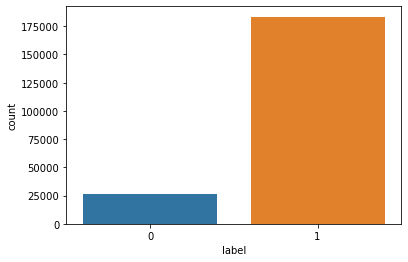

In [21]:
# Lets check the count of label
sns.countplot(x="label",data=df)


Their is highly imbalance data set ,out of 100 people only 12 to 13 people unable to return the loan

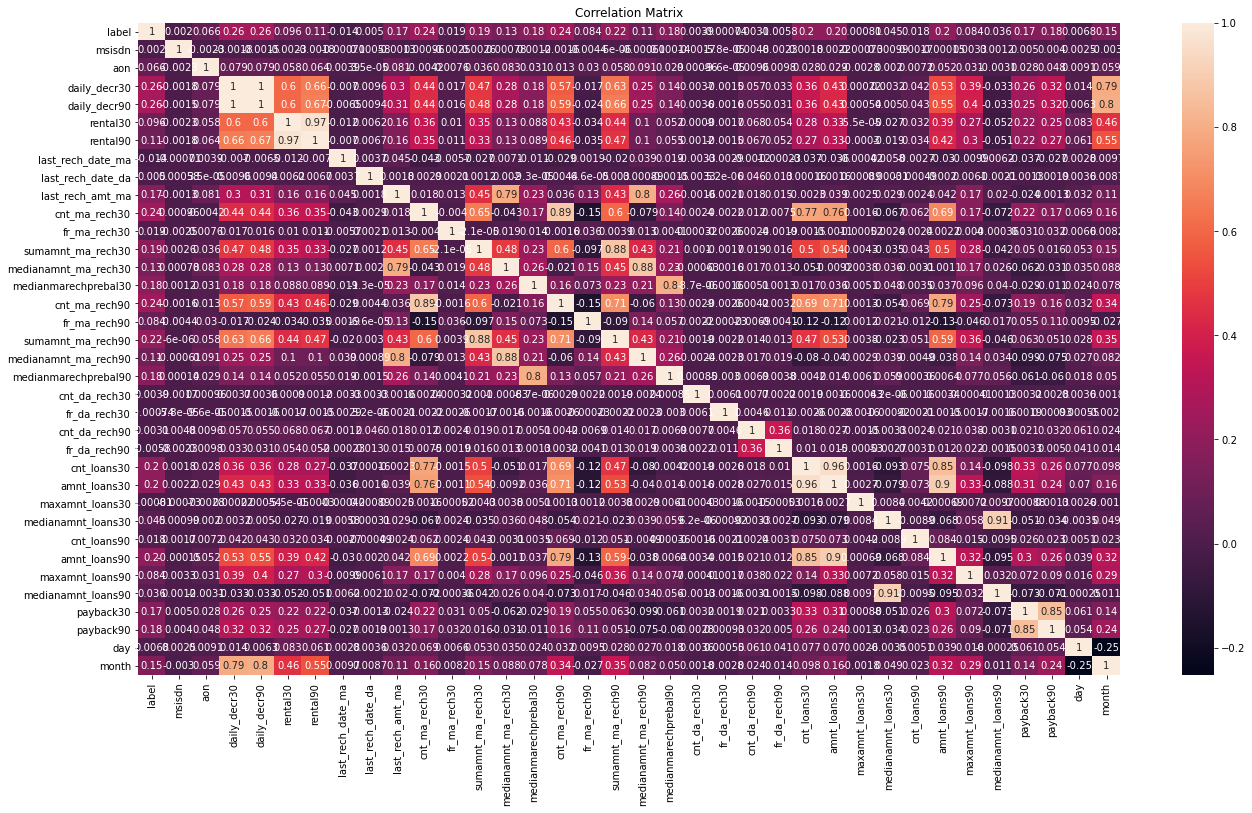

In [22]:

corr_mat=df.corr() # Example of multivarient analysis
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()


Due to the lots of collumn we cant observe anything from the correlation matrix

In [23]:
corr_matrix=df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
daily_decr90            0.262751
daily_decr30            0.261717
cnt_ma_rech30           0.239192
cnt_ma_rech90           0.238164
sumamnt_ma_rech90       0.216044
amnt_loans90            0.199860
amnt_loans30            0.197373
cnt_loans30             0.196413
sumamnt_ma_rech30       0.186063
medianmarechprebal30    0.180617
payback90               0.175943
medianmarechprebal90    0.175216
last_rech_amt_ma        0.169902
payback30               0.168042
month                   0.154949
medianamnt_ma_rech30    0.132773
medianamnt_ma_rech90    0.114257
rental90                0.111128
rental30                0.096496
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
aon                     0.066149
medianamnt_loans30      0.044595
medianamnt_loans90      0.035750
fr_ma_rech30            0.019279
cnt_loans90             0.018315
day                     0.006825
last_rech_date_da       0.004965
cnt_da_rech30           0.003888
cnt_da_rec

we can see that daily_decr90   is highly correlated with the label while last_rech_date_ma not to much correlated with label

In [24]:
x=df.drop(["label"],axis=1)
y=df["label"]

In [25]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state",maxRS)
    

Best Accuracy is  0.881691529628805 on Random_state 139


In [26]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8782404020484113
[[  375  7500]
 [  156 54847]]
              precision    recall  f1-score   support

           0       0.71      0.05      0.09      7875
           1       0.88      1.00      0.93     55003

    accuracy                           0.88     62878
   macro avg       0.79      0.52      0.51     62878
weighted avg       0.86      0.88      0.83     62878



In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8782404020484113
[[  375  7500]
 [  156 54847]]
              precision    recall  f1-score   support

           0       0.71      0.05      0.09      7875
           1       0.88      1.00      0.93     55003

    accuracy                           0.88     62878
   macro avg       0.79      0.52      0.51     62878
weighted avg       0.86      0.88      0.83     62878



In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,preddt))


0.8782404020484113
[[  375  7500]
 [  156 54847]]
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      7875
           1       0.93      0.98      0.96     55003

    accuracy                           0.92     62878
   macro avg       0.86      0.74      0.78     62878
weighted avg       0.91      0.92      0.91     62878



In [29]:
# Creating parameter List to pass GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={"max_depth":np.arange(2,15),
           "criterion":["gini",'entropy']}

In [30]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [31]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [32]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [33]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [34]:
accuracy_score(y_test,GCV_pred)

0.9170298037469385

In [35]:
import joblib
joblib.dump(GCV.best_estimator_,"Micro-Model.pk1")


['Micro-Model.pk1']